# Guía 5 - Transformada Z

## Ejercicio 2

Encuentre la respuesta en frecuencia de los sistemas anteriores suponiendo una frecuencia de muestreo de 10kHz. Tenga en cuenta la relación entre la Transformada Z y la Transformada de Fourier

### Solución

Teniendo la $H(z)$ y sabiendo que el espectro de frecuencias (el espectro de magnitudes de la Transformada de Fourier) se encuentra en el circulo unitario $z = e^{j\omega}$ podemos encontrar los valores de la DFT de la respuesta al impulso del sistema (respuesta en frecuencias):
$$
\mathcal(F)\{ h(t) \} = H(z) \quad \text{, } |z| = 1 \Leftrightarrow z = e^{j\omega}
$$

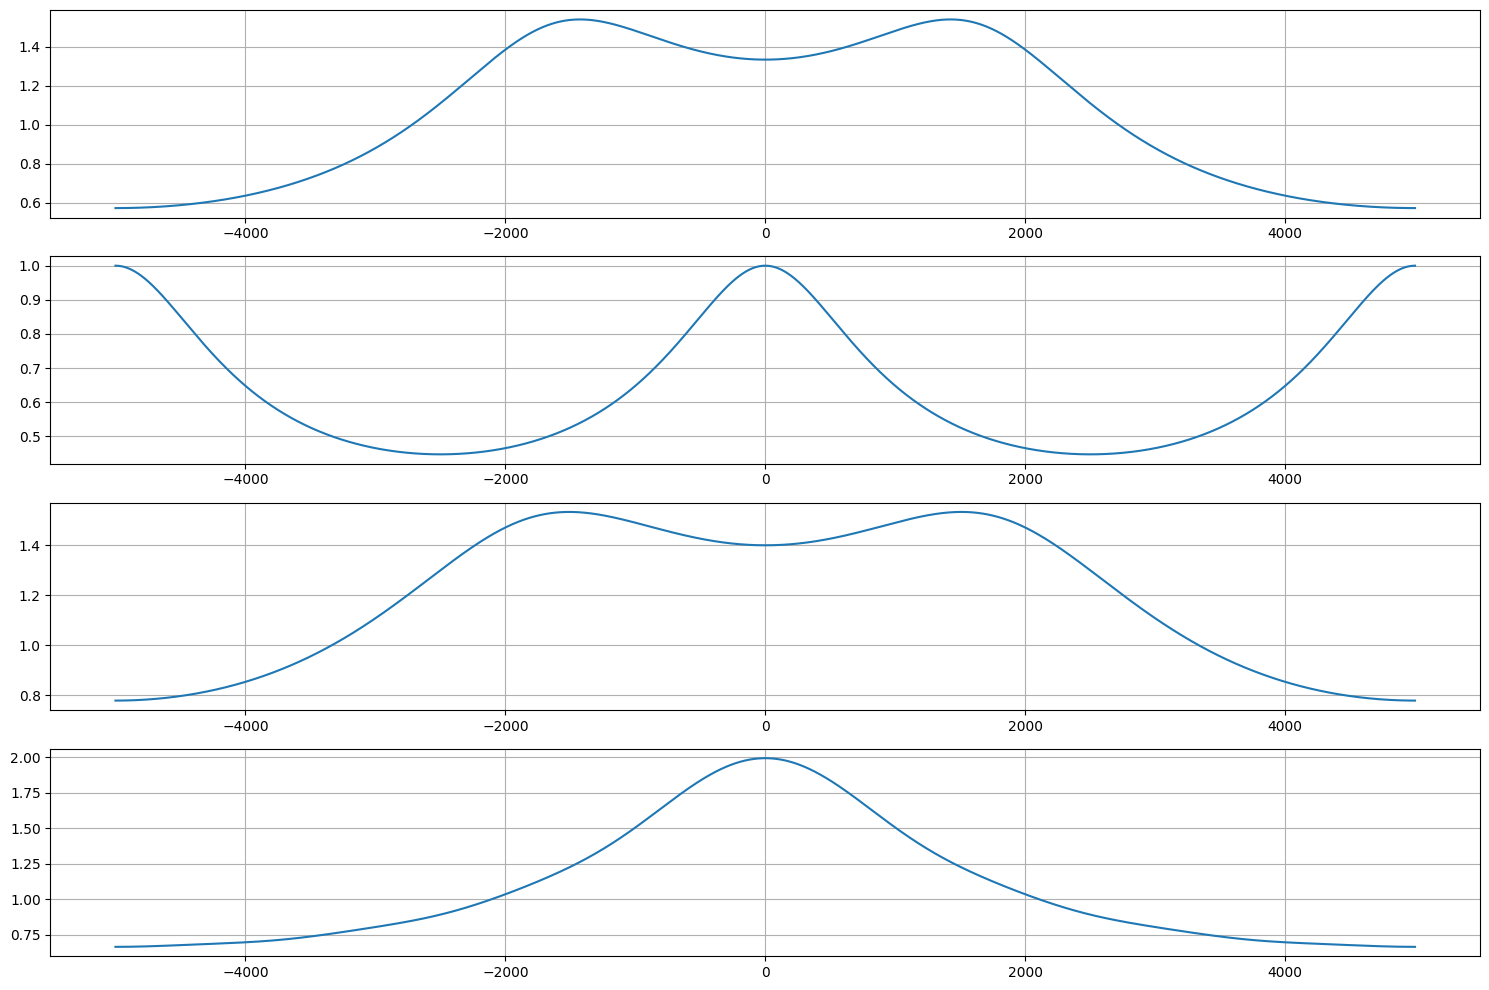

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def evaluarH(Y, X, z):
    # Sistemas LTI: potencias negativas de z, porque reflejan retardos temporales.
    # (z^-1)^k = z^-k

    # Evaluar el numerador (y)
    num = np.polyval(Y[::-1], z**-1)
    # Evaluar el denominador (x)
    den = np.polyval(X[::-1], z**-1)
    # H(z) = Y(z) / X(z)
    return num / den

# Parametros
fm = 10000 # 10 kHz

w = np.linspace(-np.pi,np.pi,fm,endpoint=False)
# Respuesta en frecuencia
z = np.exp(1j*w) # Transformada Z -> Transformada de Fourier: z = e^(jw)

H1 = evaluarH([1], [1, -1/2, 1/4], z)
H2 = evaluarH([0, 1], [1, -1, -1], z)
H3 = evaluarH([7], [1, -2, 6], z)
H4 = evaluarH([1.0 / 2**k for k in range(8)], [1], z)

# Graficar
fig, ax = plt.subplots(4)
fig.set_figheight(10)
fig.set_figwidth(15)
for axi in ax:
    axi.grid()

ax[0].plot(w * (fm / (2 * np.pi)), np.abs(H1))
ax[1].plot(w * (fm / (2 * np.pi)), np.abs(H2))
ax[2].plot(w * (fm / (2 * np.pi)), np.abs(H3))
ax[3].plot(w * (fm / (2 * np.pi)), np.abs(H4))

fig.tight_layout()

![H_1(z)](../rsc/fig5z-1.png)
![H_1(z)](../rsc/fig5z-2.png)
![H_1(z)](../rsc/fig5z-3.png)
![H_1(z)](../rsc/fig5z-4.png)
Código de graficas en `Practica/Guia5/5-1-2-3D.py`